In [15]:
import math
import random as random
import matplotlib.pyplot as plt

## A)

In [16]:
def function(x1, x2, y):
    return x1**2 + y*x2**2 - x1*x2 - x1 - x2 

def function_derivative_wrt_x1(x1, x2, y):
    return 2*x1 - x2 - 1

def function_derivative_wrt_x2(x1, x2, y):
    return 2*y*x2 - x1 - 1

def function_derivative_wrt_y(x1, x2, y):
    return x2**2

In [17]:
def gradient_descent_optimization(x1_initial, x2_initial, y_initial, step_size, threshold, file_name, max_iters=1000):
    x1 = x1_initial
    x2 = x2_initial
    y = y_initial
    step_size = step_size
    threshold = threshold
    iters = 0
    error = []

    # Write initial conditions to file
    with open(f'Gradient_Descent_Logs\{file_name}', 'w') as f:
        f.write(f'Initial Conditions: x1: {x1_initial} x2: {x2_initial} y: {y_initial} step_size: {step_size} threshold: {threshold}\n')

    while math.fabs(function_derivative_wrt_x1(x1, x2, y)) > threshold and math.fabs(function_derivative_wrt_x2(x1, x2, y)) > threshold and math.fabs(function_derivative_wrt_y(x1, x2, y)) > threshold and iters < max_iters:
        error.append(function(x1, x2, y))
        x1 = x1 - step_size * function_derivative_wrt_x1(x1, x2, y)
        x2 = x2 - step_size * function_derivative_wrt_x2(x1, x2, y)
        iters += 1
        
        with open(f'Gradient_Descent_Logs\{file_name}', 'a') as f:
            f.write(f'Iteration: {iters} x1: {x1} x2: {x2} y: {y} function: {function(x1, x2, y)} function_derivative_wrt_x1: {function_derivative_wrt_x1(x1, x2, y)} function_derivative_wrt_x2: {function_derivative_wrt_x2(x1, x2, y)} function_derivative_wrt_y: {function_derivative_wrt_y(x1, x2, y)}\n')
    
    return {
        'x1': x1,
        'x2': x2,
        'y': y,
        'iters': iters,
        'step_size': step_size,
        'threshold': threshold,
        'max_iters': max_iters,
        'max_iters_reached': iters == max_iters,
        'error': error,
        'function': function(x1, x2, y),
        'function_derivative_wrt_x1': function_derivative_wrt_x1(x1, x2, y),
        'function_derivative_wrt_x2': function_derivative_wrt_x2(x1, x2, y),
        'function_derivative_wrt_y': function_derivative_wrt_y(x1, x2, y)
    }

## B)

In [18]:
random.seed(0)
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
y_initial = 1
optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y_initial, 0.1, 1e-5, 'PartB.txt')

In [19]:
print(f'x1_initial: {x1_initial}')
print(f'x2_initial: {x2_initial}')
print(f'Steps: {optimization_result["iters"]}')

x1_initial: 6.888437030500963
x2_initial: 5.159088058806049
Steps: 117


## C)

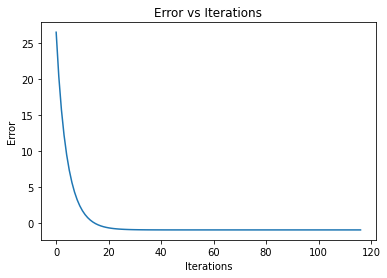

In [20]:
# Plot the error vs iterations
plt.plot(optimization_result['error'])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations')
plt.show()

## D)

In [21]:
random.seed(0)
step_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
iters_to_converge = []
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
y_initial = 1
for step_size in step_sizes:
    optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y_initial, step_size, 1e-5, f'PartD_StepSize_{step_size}.txt')
    iters_to_converge.append(optimization_result['iters'])

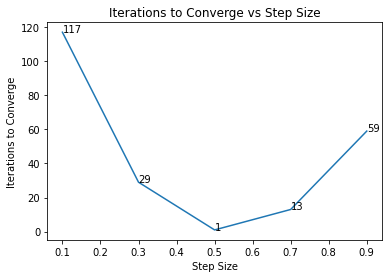

In [22]:
# Plot the number of iterations required to converge vs step size
plt.plot(step_sizes, iters_to_converge)
plt.xlabel('Step Size')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs Step Size')
# Add Labels
for i, txt in enumerate(iters_to_converge):
    plt.annotate(txt, (step_sizes[i], iters_to_converge[i]))
plt.show()

## E)

In [42]:
# 5 Random Values of y between 0 and 1
random.seed(0)
y_values = [random.uniform(0, 1) for i in range(5)]
y_values.sort()
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
step_size = 0.1
iters_to_converge = []
for y in y_values:
    optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y, step_size, 1e-5, f'PartE_y_{y}.txt')
    iters_to_converge.append(optimization_result['iters'])


In [43]:
y_values

[0.25891675029296335,
 0.420571580830845,
 0.5112747213686085,
 0.7579544029403025,
 0.8444218515250481]

In [44]:
iters_to_converge

[1000, 331, 230, 143, 127]

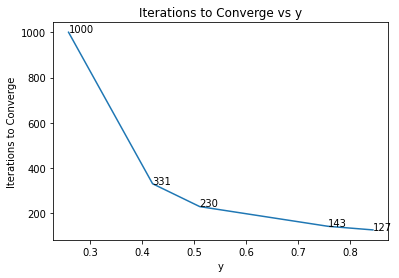

In [45]:
# Plot the number of iterations required to converge vs y
plt.plot(y_values, iters_to_converge)
plt.xlabel('y')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs y')
# Add Labels
for i, txt in enumerate(iters_to_converge):
    plt.annotate(txt, (y_values[i], iters_to_converge[i]))
plt.show()

## F)

In [27]:
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
y_initial = -1
optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y_initial, 0.1, 1e-5, 'PartF.txt', max_iters=1000)

In [28]:
optimization_result

{'x1': -3.87175786138439e+88,
 'x2': -1.659678149427563e+89,
 'y': -1,
 'iters': 1000,
 'step_size': 0.1,
 'threshold': 1e-05,
 'max_iters': 1000,
 'max_iters_reached': True,
 'error': [17.81584634670757,
  10.456459552588484,
  5.764756173814608,
  2.598094699156367,
  0.20622521026273,
  -1.9484022352303896,
  -4.314020312305341,
  -7.345524320560873,
  -11.594249654373929,
  -17.809853954095754,
  -27.073578543266418,
  -40.986881415877164,
  -61.9485442967038,
  -93.5683231632512,
  -141.28854685474127,
  -213.32074796605224,
  -322.05854873180283,
  -486.2099213610741,
  -734.0156775458646,
  -1108.1078969469236,
  -1672.844121498874,
  -2525.379053067128,
  -3812.3784661817617,
  -5755.250697866892,
  -8688.236387255227,
  -13115.90919152079,
  -19799.97954970172,
  -29890.334682579847,
  -45122.85814768871,
  -68118.06061399927,
  -102831.89646543797,
  -155236.32196005702,
  -234346.6740014912,
  -353772.61347283405,
  -534059.4479230158,
  -806222.6204176953,
  -1217083.416364

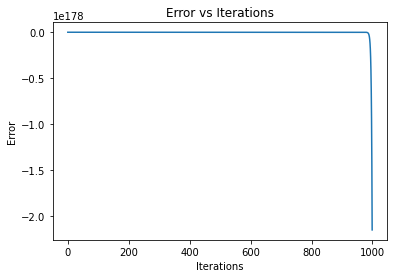

In [33]:
# Plot the error vs iterations
plt.plot(optimization_result['error'])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations')
plt.show()

x1 and x2 have grown without any convergence to a fixed point. This is because for y = -1 there exists no minima and the curve is a hull like structure which is not convex. Hence, the gradient descent algorithm will not converge to a fixed point.